In [1]:
# Music Classification - CSCI 4622 Final Project
# Giovanni Visco, Ishan Kumar, Avnish Asthana, Dhruv Patel

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

plt.style.use('ggplot')
import librosa
from librosa import feature
from librosa import display
genres = [
    'blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop',
    'reggae', 'rock'
]

In [50]:
# list data
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/blues\blues.00000.au
./data/blues\blues.00001.au
./data/blues\blues.00002.au
./data/blues\blues.00003.au
./data/blues\blues.00004.au
./data/blues\blues.00005.au
./data/blues\blues.00006.au
./data/blues\blues.00007.au
./data/blues\blues.00008.au
./data/blues\blues.00009.au
./data/blues\blues.00010.au
./data/blues\blues.00011.au
./data/blues\blues.00012.au
./data/blues\blues.00013.au
./data/blues\blues.00014.au
./data/blues\blues.00015.au
./data/blues\blues.00016.au
./data/blues\blues.00017.au
./data/blues\blues.00018.au
./data/blues\blues.00019.au
./data/blues\blues.00020.au
./data/blues\blues.00021.au
./data/blues\blues.00022.au
./data/blues\blues.00023.au
./data/blues\blues.00024.au
./data/blues\blues.00025.au
./data/blues\blues.00026.au
./data/blues\blues.00027.au
./data/blues\blues.00028.au
./data/blues\blues.00029.au
./data/blues\blues.00030.au
./data/blues\blues.00031.au
./data/blues\blues.00032.au
./data/blues\blues.00033.au
./data/blues\blues.00034.au
./data/blues\blues.0

In [5]:
# create a list of all features

features = 'filename chroma_stft_mean spectral_centroid_mean spectral_bandwidth_mean rolloff_mean zero_crossing_rate_mean tempo' 
for i in range(1, 21):
    features += f' mfcc{i}_mean'
features += ' genre'
features = features.split()

# create an empty dataframe
dfFeatures = pd.DataFrame(columns = features)
dfFeatures

,filename,chroma_stft_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,tempo,mfcc1_mean,mfcc2_mean,mfcc3_mean,...,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,genre


In [52]:
# load audio time series into a list using librosa.load, create list of corresponding labels
for genre in genres:
    # identify the path using the genre
    path = './data/' + genre
    # loop through every file in the path
    for file in os.listdir(path):
        filename = path + '/' + file
        
        # load time series and sampling rate
        y, sr = librosa.load(filename, mono = True, duration = 10)
        
        # extract all features from time series and sampling rate
        chromaStft = librosa.feature.chroma_stft(y=y, sr=sr)
        specCent = librosa.feature.spectral_centroid(y=y, sr=sr)
        specBandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zeroCrossing = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        tempo = librosa.beat.tempo(y=y, sr=sr)
        
        # personal check to make sure we dont get dynamic tempo
        if len(tempo) != 1:
            raise ValueError("Dynamic tempo was returned.")
        
        # dictionary to upload current row
        uploadDict = {}
        uploadDict['filename'] = file
        uploadDict['genre'] = genre
        
        # get the mean of all the mfcc
        mfccMeans = []
        for index, value in enumerate(mfcc):
            currMfcc = f'mfcc{index+1}_mean'
            mfccMean = np.mean(value)
            uploadDict[currMfcc] = mfccMean

        # get the means and add to dict
        uploadDict['chroma_stft_mean'] = np.mean(chromaStft)
        uploadDict['spectral_centroid_mean'] = np.mean(specCent)
        uploadDict['spectral_bandwidth_mean'] = np.mean(specBandwidth)
        uploadDict['rolloff_mean'] = np.mean(rolloff)
        uploadDict['zero_crossing_rate_mean'] = np.mean(zeroCrossing)
        uploadDict['tempo'] = tempo[0]
        
        # append all values to dataframe
        dfFeatures = dfFeatures.append(uploadDict, ignore_index = True)
            
            
            
        
dfFeatures.head()

,filename,chroma_stft_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,tempo,mfcc1_mean,mfcc2_mean,mfcc3_mean,...,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,genre
0,blues.00000.au,0.342053,1782.622682,2020.556328,3845.075667,0.080111,123.046875,-125.188171,120.222137,-18.358818,...,9.301556,-4.159669,7.119120,-5.663028,0.530103,-2.870996,0.306077,-2.700369,2.370232,blues
1,blues.00001.au,0.358000,1364.273766,1842.030467,2976.303348,0.055211,107.666016,-221.931198,131.147629,0.490468,...,6.931743,-1.881995,4.951429,-4.531081,-0.463962,0.497853,0.039326,-1.083576,-0.112309,blues
2,blues.00002.au,0.382027,1521.556846,1736.799388,3028.062974,0.070182,151.999081,-99.112022,141.554123,-25.738703,...,4.544575,-8.695225,-2.315017,-8.144971,2.917833,-6.660074,-2.039234,-2.045270,-2.697336,blues
3,blues.00003.au,0.391765,947.018874,1427.836298,1863.946038,0.030092,63.024009,-214.465668,156.586929,2.785257,...,4.701363,-2.364664,-0.866406,-3.422017,-0.273013,0.231585,2.437521,1.284240,-2.200283,blues
4,blues.00004.au,0.316456,2046.427867,1858.463045,4005.025898,0.116385,135.999178,-151.967178,115.340431,-31.880495,...,-4.082293,-4.755991,-7.974098,-9.649985,-2.115260,-8.198335,-1.059961,-3.900608,-12.995133,blues


In [53]:
dfFeatures.to_csv(r'.\music_features.csv', index = False)

In [2]:
dfFeatures = pd.read_csv(".\music_features.csv")
dfFeatures

,filename,chroma_stft_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,tempo,mfcc1_mean,mfcc2_mean,mfcc3_mean,...,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,genre
0,blues.00000.au,0.342053,1782.622682,2020.556328,3845.075667,0.080111,123.046875,-125.188171,120.222137,-18.358818,...,9.301556,-4.159669,7.119120,-5.663028,0.530103,-2.870996,0.306077,-2.700369,2.370232,blues
1,blues.00001.au,0.358000,1364.273766,1842.030467,2976.303348,0.055211,107.666016,-221.931198,131.147629,0.490468,...,6.931743,-1.881995,4.951429,-4.531081,-0.463962,0.497853,0.039326,-1.083576,-0.112309,blues
2,blues.00002.au,0.382027,1521.556846,1736.799388,3028.062974,0.070182,151.999081,-99.112022,141.554123,-25.738703,...,4.544575,-8.695225,-2.315017,-8.144971,2.917833,-6.660074,-2.039234,-2.045270,-2.697336,blues
3,blues.00003.au,0.391765,947.018874,1427.836298,1863.946038,0.030092,63.024009,-214.465668,156.586929,2.785257,...,4.701363,-2.364664,-0.866406,-3.422017,-0.273013,0.231585,2.437521,1.284240,-2.200283,blues
4,blues.00004.au,0.316456,2046.427867,1858.463045,4005.025898,0.116385,135.999178,-151.967178,115.340431,-31.880495,...,-4.082293,-4.755991,-7.974098,-9.649985,-2.115260,-8.198335,-1.059961,-3.900608,-12.995133,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.au,0.342631,2020.897766,2115.237173,4216.635833,0.086844,103.359375,-176.202835,107.135880,-21.538500,...,11.735725,-11.921124,8.356419,-9.729358,0.255304,-15.018360,1.144886,-9.904478,-3.585886,rock
996,rock.00096.au,0.403539,1936.027149,2076.711416,4135.748928,0.082026,112.347147,-195.591171,115.837006,-24.521795,...,13.581984,-14.986915,4.433083,-0.821032,5.259275,-9.546398,-0.957006,-7.170838,-5.851133,rock
997,rock.00097.au,0.390121,1850.428852,1892.937775,3771.233267,0.094739,129.199219,-156.146378,123.504677,-38.973907,...,11.602478,-16.736261,-1.253509,-10.651410,-0.178072,-11.048622,3.768486,-10.938493,-1.524094,rock
998,rock.00098.au,0.345589,1364.495684,1819.793515,2996.062935,0.045580,112.347147,-200.912430,126.177391,-13.138278,...,6.853084,-11.460313,-0.280818,-4.275995,-2.722999,-4.359686,2.195941,-4.254704,-5.173638,rock


In [3]:
dfFeatures.describe()

,chroma_stft_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,tempo,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,...,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.378243,2195.364727,2240.801858,4552.872528,0.102850,121.224581,-150.375004,100.022444,-8.967196,36.926952,...,-6.213609,4.578687,-5.037197,1.830117,-4.138268,1.182673,-4.189579,0.467038,-2.453256,-0.944147
std,0.084811,724.409422,530.636869,1597.477805,0.042878,20.849283,103.065530,32.522822,22.908203,17.110494,...,7.203759,7.044340,6.375523,5.570531,5.305283,5.059570,4.947419,4.302684,4.251254,4.423207
min,0.169436,573.734074,818.300779,713.443482,0.021978,63.024009,-552.167358,-3.186250,-90.585678,-26.256821,...,-29.059774,-17.884222,-26.665312,-17.130505,-20.879305,-16.697058,-17.121948,-15.020533,-16.677183,-21.443336
25%,0.313917,1618.840893,1882.639599,3362.277271,0.068668,107.666016,-205.656609,76.693705,-25.267201,24.342756,...,-11.457920,-0.476554,-9.649565,-2.050092,-7.939316,-2.211982,-7.709534,-2.227706,-5.011404,-3.485067
50%,0.385615,2200.529732,2219.565695,4648.786236,0.097355,117.453835,-125.455219,97.914761,-10.973664,37.408300,...,-6.055956,4.176780,-4.545135,1.894884,-3.918965,1.117782,-4.348048,0.529457,-2.484010,-1.107651
75%,0.439533,2710.086942,2577.627184,5591.063717,0.132396,135.999178,-75.868145,121.263073,6.639579,48.873474,...,-1.000470,10.017669,-0.326451,5.676679,-0.505713,4.400712,-0.963768,3.220952,0.116097,1.752495
max,0.638128,4414.072483,3609.161381,8662.967492,0.279438,184.570312,30.940403,206.139923,63.647160,81.823479,...,19.503809,23.477524,11.121980,23.422976,13.354610,18.912750,14.527686,19.614573,21.882849,18.878752


In [9]:
# visualize distribution of each feature through histogram

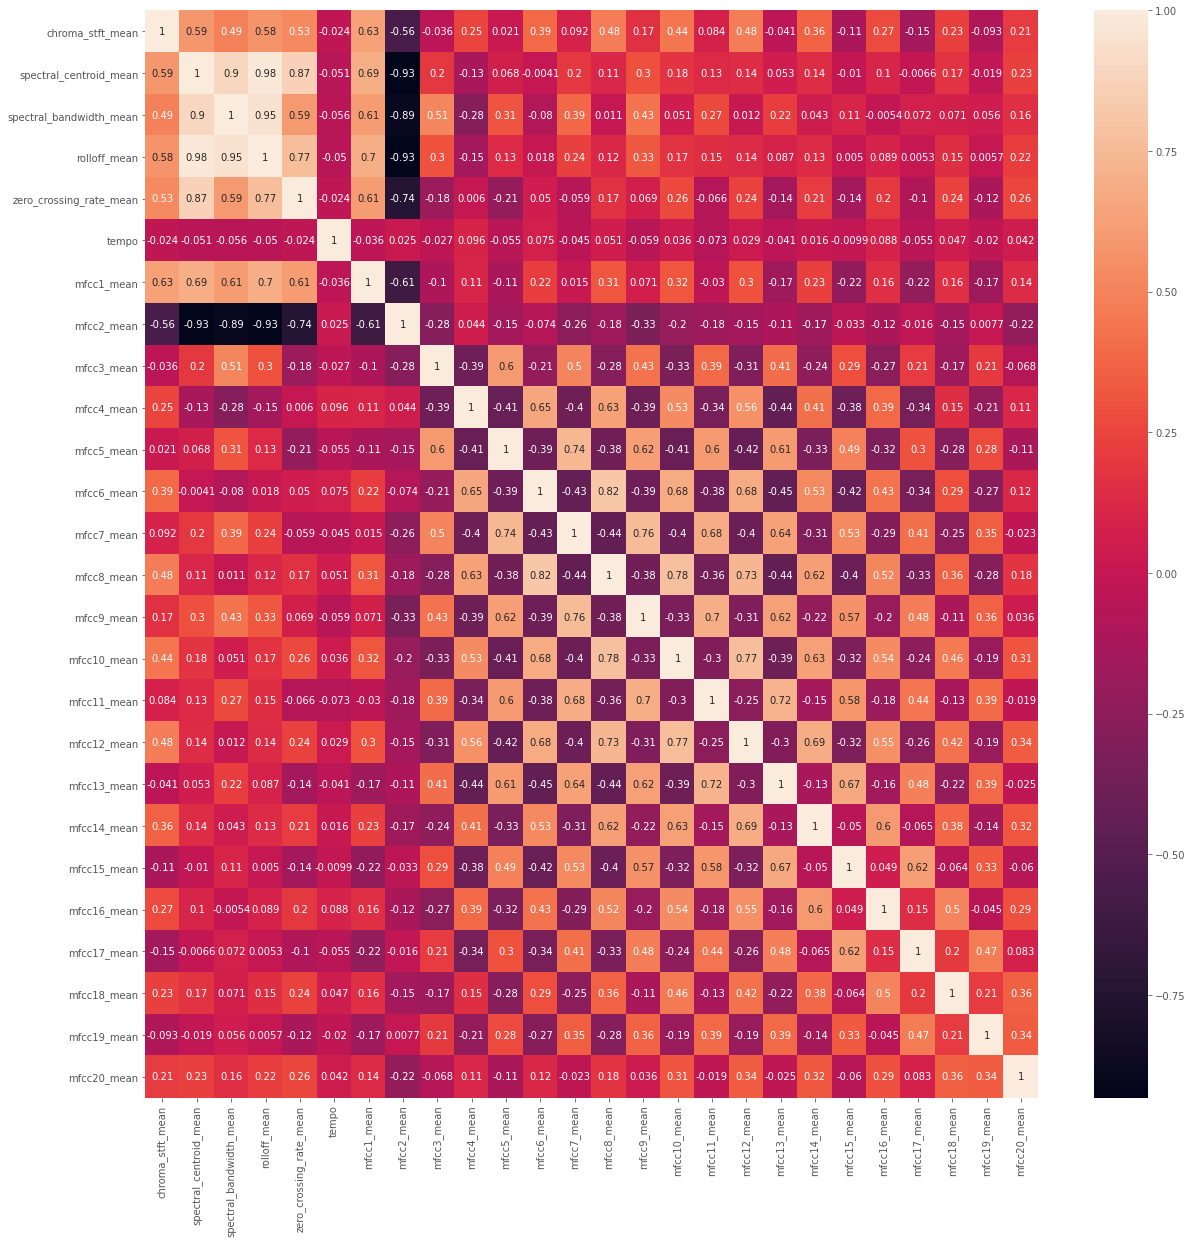

In [4]:

corrMatrix = dfFeatures.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
# initalize neural network

In [ ]:
# train neural network

In [ ]:
# test neural network